In [1]:
#mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
#change directory
import os
os.chdir("drive/My Drive/Machine Learning/Datasets/Final Project")
#print out the current directory
!pwd

Mounted at /content/drive
/content/drive/My Drive/Machine Learning/Datasets/Final Project


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
df_wine = pd.read_csv(url, header=None)

In [4]:
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [5]:
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


**we only select the subset of the eigenvectors (principal components) that contains most of the information (variance)**

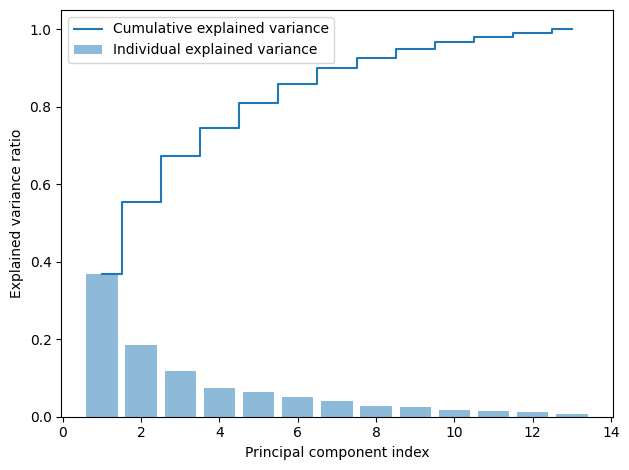

In [6]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt
plt.bar(range(1, 14), var_exp, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [7]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [8]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


In [9]:
X_train_std[0].dot(w)

array([2.38299011, 0.45458499])

In [10]:
X_train_pca = X_train_std.dot(w)

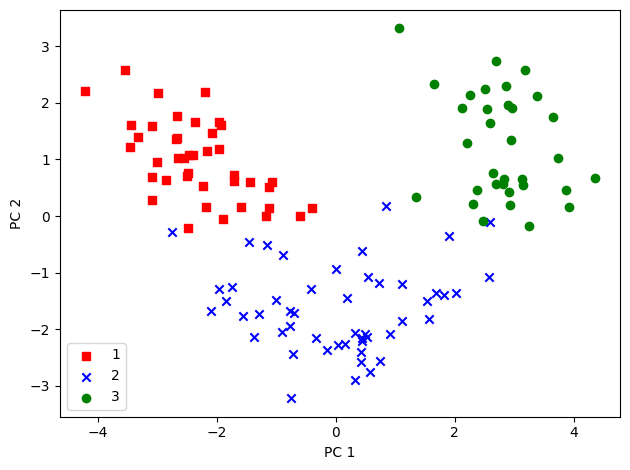

In [11]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0],
                X_train_pca[y_train==l, 1],
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [12]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, Y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(Y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot examples by class
    for idx, cl in enumerate(np.unique(Y)):
        plt.scatter(x=X[Y == cl, 0],
                    y=X[Y == cl, 1],
                    alpha=0.6,
                    color=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx],
                    label=cl)

<ipython-input-12-7e0a185f0551>:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[Y == cl, 0],


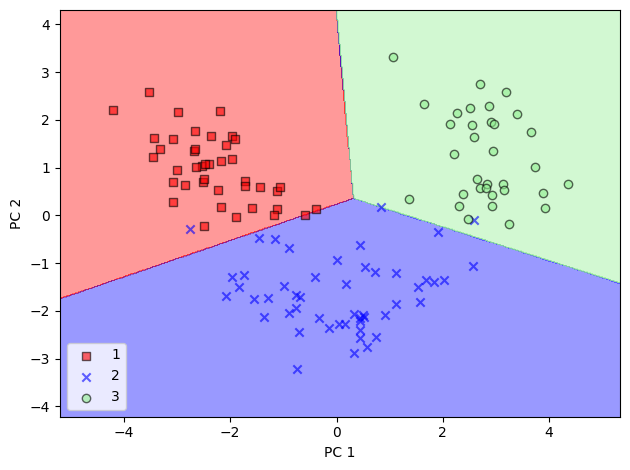

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

# initializing the PCA transformer and logistic regression estimator:
pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')

# dimensionality reduction:
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# fitting the logistic regression model on the reduced dataset:
lr.fit(X_train_pca, y_train)

# plot decision regions:
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

**PCA can be combined with logistic regression to classify a reduced dimensionality dataset effectively**

<ipython-input-12-7e0a185f0551>:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[Y == cl, 0],


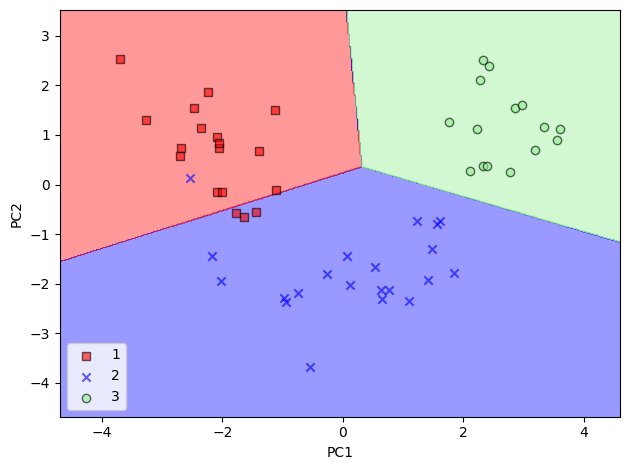

In [14]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [15]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

In [16]:
np.set_printoptions(precision=4)
mean_vecs = []
for label in range(1,4):
	mean_vecs.append(np.mean(
	X_train_std[y_train==label], axis=0))
	print('MV %s: %s\n' %(label, mean_vecs[label-1]))

MV 1: [ 0.9066 -0.3497  0.3201 -0.7189  0.5056  0.8807  0.9589 -0.5516  0.5416
  0.2338  0.5897  0.6563  1.2075]

MV 2: [-0.8749 -0.2848 -0.3735  0.3157 -0.3848 -0.0433  0.0635 -0.0946  0.0703
 -0.8286  0.3144  0.3608 -0.7253]

MV 3: [ 0.1992  0.866   0.1682  0.4148 -0.0451 -1.0286 -1.2876  0.8287 -0.7795
  0.9649 -1.209  -1.3622 -0.4013]



In [17]:
d = 13 # number of features
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
	class_scatter = np.zeros((d, d))
for row in X_train_std[y_train == label]:
	row, mv = row.reshape(d, 1), mv.reshape(d, 1)
	class_scatter += (row - mv).dot((row - mv).T)
	S_W += class_scatter
print('Within-class scatter matrix: %sx%s' % (S_W.shape[0], S_W.shape[1]))

Within-class scatter matrix: 13x13


In [18]:
print('Class label distribution: %s'% np.bincount(y_train)[1:])

Class label distribution: [41 50 33]


In [19]:
d = 13 # number of features
S_W = np.zeros((d, d))
for label,mv in zip(range(1, 4), mean_vecs):
	class_scatter = np.cov(X_train_std[y_train==label].T)
	S_W += class_scatter
print('Scaled within-class scatter matrix: %sx%s'
  % (S_W.shape[0], S_W.shape[1]))

Scaled within-class scatter matrix: 13x13


In [20]:
mean_overall = np.mean(X_train_std, axis=0)
d = 13 # number of features
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
	n = X_train_std[y_train == i + 1, :].shape[0]
	mean_vec = mean_vec.reshape(d, 1) # make column vector
	mean_overall = mean_overall.reshape(d, 1)
	S_B += n * (mean_vec - mean_overall).dot(
	(mean_vec - mean_overall).T)
print('Between-class scatter matrix: %sx%s' % (
	S_B.shape[0], S_B.shape[1]))

Between-class scatter matrix: 13x13


In [24]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [25]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i])
	for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs,
	key=lambda k: k[0], reverse=True)
print('Eigenvalues in descending order:\n')
for eigen_val in eigen_pairs:
	print(eigen_val[0])

Eigenvalues in descending order:

349.61780890599397
172.7615221897938
3.342838214841367e-14
2.842170943040401e-14
2.5545786180111422e-14
1.7533939180734234e-14
1.7533939180734234e-14
1.6579193995960903e-14
1.6579193995960903e-14
8.242524002707225e-15
8.242524002707225e-15
6.36835506006027e-15
2.974634375545734e-15


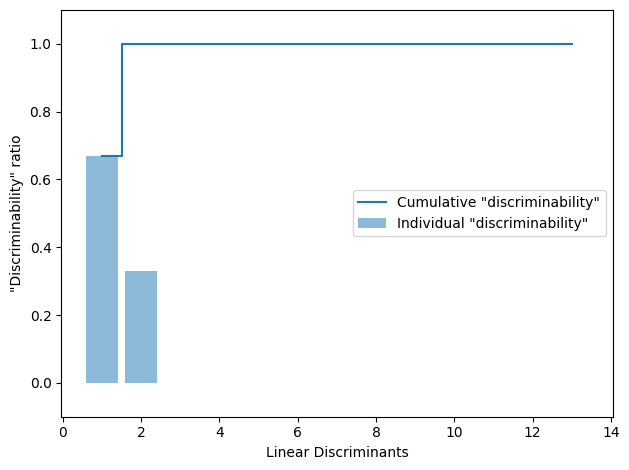

In [26]:
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)
plt.bar(range(1, 14), discr, alpha=0.5, align='center',
	label='Individual "discriminability"')
plt.step(range(1, 14), cum_discr, where='mid',
	label='Cumulative "discriminability"')
plt.ylabel('"Discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [27]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real, eigen_pairs[1][1][:, np.newaxis].real))
print('Matrix W:\n', w)

Matrix W:
 [[-0.1481 -0.4092]
 [ 0.0908 -0.1577]
 [-0.0168 -0.3537]
 [ 0.1484  0.3223]
 [-0.0163 -0.0817]
 [ 0.1913  0.0842]
 [-0.7338  0.2823]
 [-0.075  -0.0102]
 [ 0.0018  0.0907]
 [ 0.294  -0.2152]
 [-0.0328  0.2747]
 [-0.3547 -0.0124]
 [-0.3915 -0.5958]]


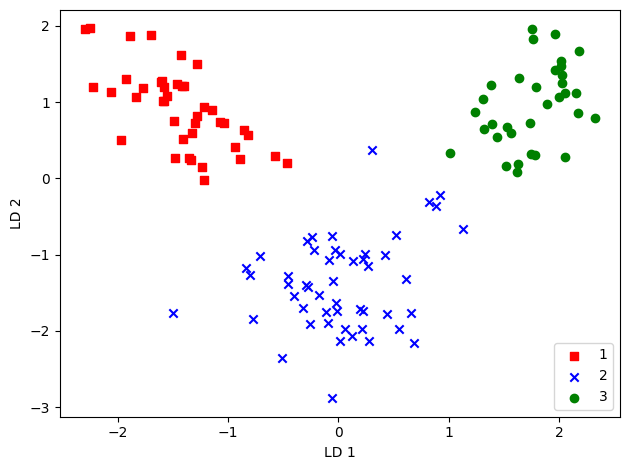

In [28]:
X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
	plt.scatter(X_train_lda[y_train==l, 0],
	X_train_lda[y_train==l, 1] * (-1),
	c=c, label=l, marker=m)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [29]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

<ipython-input-12-7e0a185f0551>:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[Y == cl, 0],


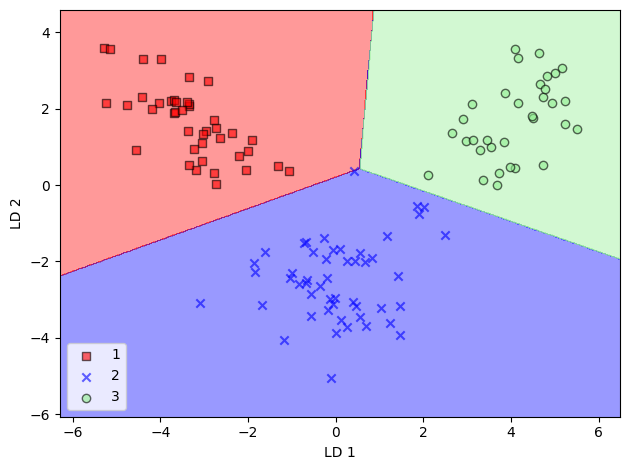

In [30]:
lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
lr = lr.fit(X_train_lda, y_train)
plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

<ipython-input-12-7e0a185f0551>:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[Y == cl, 0],


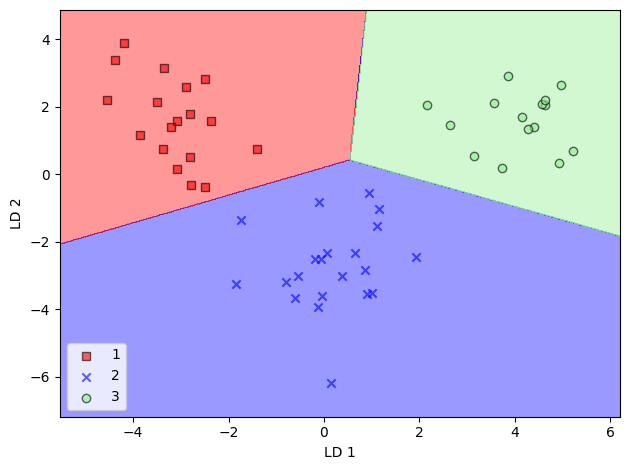

In [31]:
X_test_lda = lda.transform(X_test_std)
plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [49]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np
def rbf_kernel_pca(X, gamma, n_components):
 # Calculate pairwise squared Euclidean distances
 # in the MxN dimensional dataset.
 sq_dists = pdist(X, 'sqeuclidean')

 # Convert pairwise distances into a square matrix.
 mat_sq_dists = squareform(sq_dists)

 # Compute the symmetric kernel matrix.
 K = exp(-gamma * mat_sq_dists)

 # Center the kernel matrix.
 N = K.shape[0]
 one_n = np.ones((N,N)) / N
 K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

 # Obtaining eigenpairs from the centered kernel matrix
 # scipy.linalg.eigh returns them in ascending order
 eigvals, eigvecs = eigh(K)
 eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]
 # Collect the top k eigenvectors (projected examples)
 X_pc = np.column_stack([eigvecs[:, i]
 for i in range(n_components)])

 return X_pc

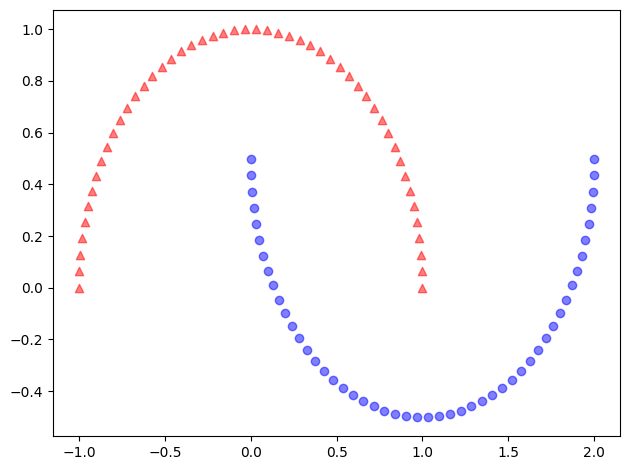

In [33]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123)
plt.scatter(X[y==0, 0], X[y==0, 1],
	color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1],
	color='blue', marker='o', alpha=0.5)
plt.tight_layout()
plt.show()

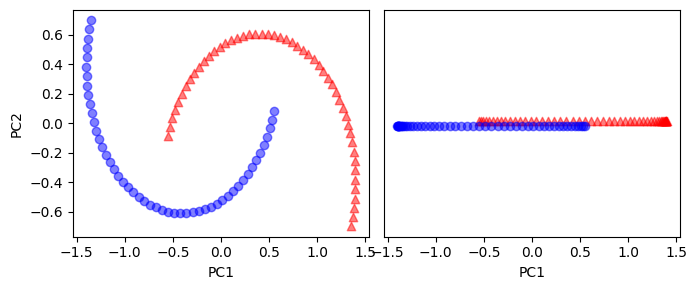

In [34]:
from sklearn.decomposition import PCA
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax[0].scatter(X_spca[y==0, 0], X_spca[y==0, 1],
	color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y==1, 0], X_spca[y==1, 1],
	color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_spca[y==0, 0], np.zeros((50,1))+0.02,
	color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y==1, 0], np.zeros((50,1))-0.02,
	color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
plt.show()

<ipython-input-32-ec773cc1063a>:33: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  K = exp(-gamma * mat_sq_dists)


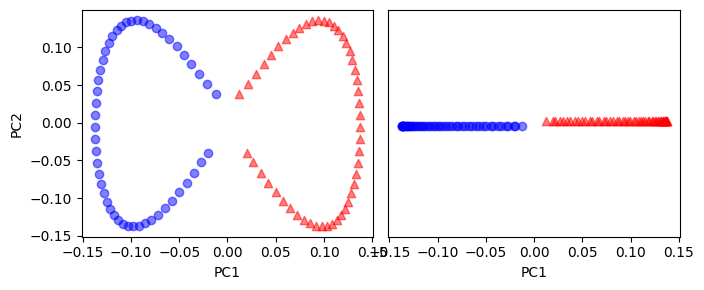

In [35]:
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1],
	color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],
	color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_kpca[y==0, 0], np.zeros((50,1))+0.02,
	color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((50,1))-0.02,
	color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
plt.show()

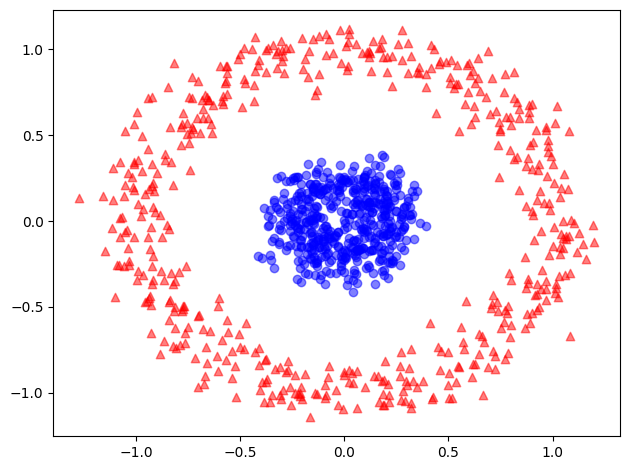

In [50]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000,
	random_state=123, noise=0.1,
	factor=0.2)
plt.scatter(X[y == 0, 0], X[y == 0, 1],
	color='red', marker='^', alpha=0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1],
	color='blue', marker='o', alpha=0.5)
plt.tight_layout()
plt.show()

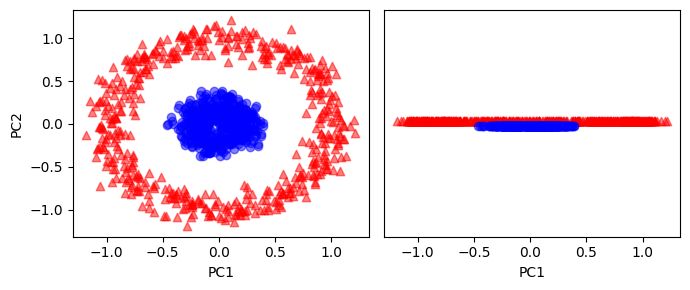

In [37]:
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax[0].scatter(X_spca[y==0, 0], X_spca[y==0, 1],
	color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y==1, 0], X_spca[y==1, 1],
	color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_spca[y==0, 0], np.zeros((500,1))+0.02,
	color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y==1, 0], np.zeros((500,1))-0.02,
	color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
plt.show()

<ipython-input-32-ec773cc1063a>:33: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  K = exp(-gamma * mat_sq_dists)


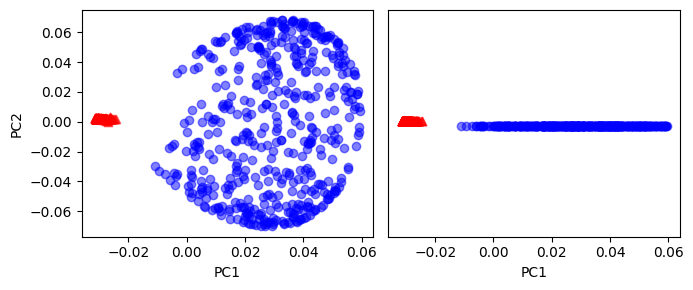

In [38]:
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(7,3))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1],
	color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],
	color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_kpca[y==0, 0], np.zeros((500,1))+0.02,
	color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((500,1))-0.02,
	color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
plt.show()

In [48]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np
def rbf_kernel_pca(X, gamma, n_components):
 # Calculate pairwise squared Euclidean distances
 # in the MxN dimensional dataset.
 sq_dists = pdist(X, 'sqeuclidean')

 # Convert pairwise distances into a square matrix.
 mat_sq_dists = squareform(sq_dists)

 # Compute the symmetric kernel matrix.
 K = exp(-gamma * mat_sq_dists)

 # Center the kernel matrix.
 N = K.shape[0]
 one_n = np.ones((N,N)) / N
 K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

 # Obtaining eigenpairs from the centered kernel matrix
 # scipy.linalg.eigh returns them in ascending order
 eigvals, eigvecs = eigh(K)
 eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]

 # Collect the top k eigenvectors (projected examples)
 alphas = np.column_stack([eigvecs[:, i]
 for i in range(n_components)])

 # Collect the corresponding eigenvalues
 lambdas = [eigvals[i] for i in range(n_components)]
 return alphas, lambdas

In [40]:
X, y = make_moons(n_samples=100, random_state=123)
alphas, lambdas = rbf_kernel_pca(X, gamma=15, n_components=1)

<ipython-input-39-554b60509251>:34: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  K = exp(-gamma * mat_sq_dists)


In [41]:
x_new = X[25]
x_new

array([1.8713, 0.0093])

In [42]:
x_proj = alphas[25] # original projection
x_proj

array([-0.0788])

In [43]:
def project_x(x_new, X, gamma, alphas, lambdas):
	pair_dist = np.array([np.sum(
	(x_new-row)**2) for row in X])
	k = np.exp(-gamma * pair_dist)
	return k.dot(alphas / lambdas)

In [44]:
x_reproj = project_x(x_new, X, gamma=15, alphas=alphas, lambdas=lambdas)
x_reproj

array([-0.0788])

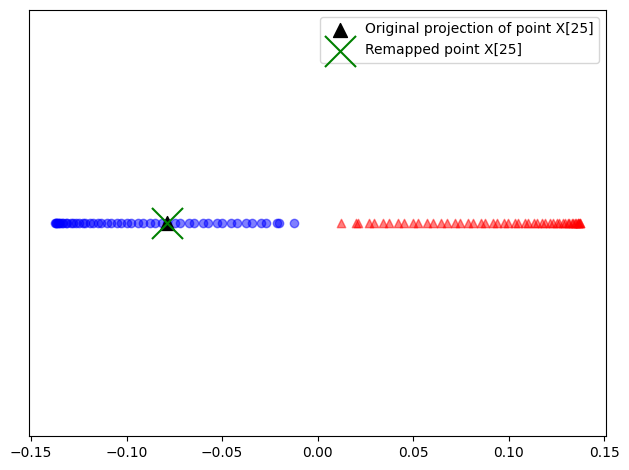

In [45]:
plt.scatter(alphas[y==0, 0], np.zeros((50)),
	color='red', marker='^',alpha=0.5)
plt.scatter(alphas[y==1, 0], np.zeros((50)),
	color='blue', marker='o', alpha=0.5)
plt.scatter(x_proj, 0, color='black',
	label='Original projection of point X[25]',
	marker='^', s=100)
plt.scatter(x_reproj, 0, color='green',
	label='Remapped point X[25]',
	marker='x', s=500)
plt.yticks([], [])
plt.legend(scatterpoints=1)
plt.tight_layout()
plt.show()

In [46]:
from sklearn.decomposition import KernelPCA
X, y = make_moons(n_samples=100, random_state=123)
scikit_kpca = KernelPCA(n_components=2,
	kernel='rbf', gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)

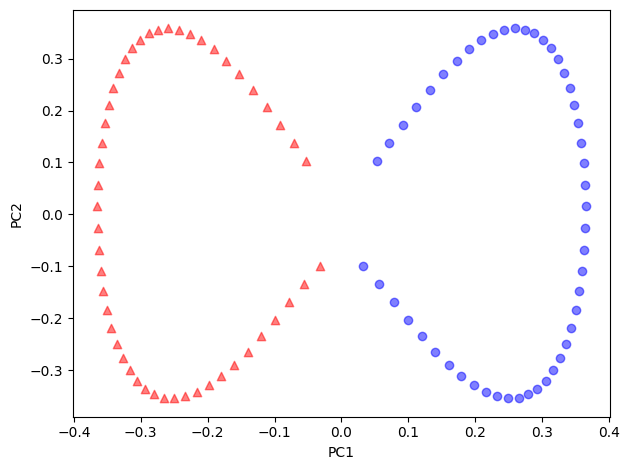

In [47]:
plt.scatter(X_skernpca[y==0, 0], X_skernpca[y==0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X_skernpca[y==1, 0], X_skernpca[y==1, 1], color='blue', marker='o', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.show()